In [1]:
import tensorflow
tensorflow.__version__

'2.11.0'

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
df = pd.read_table("AOI_hitStimuli1Polygon.txt")


In [10]:
df.head(10
        )

,Skill_level,Gaze_point_X,Gaze_point_Y,Gaze_event_duration,Fixation_point_X,Fixation_point_Y,AOI_hit_Stimuli1_Polygon
0,Skilled,612,325,699,615,329,0
1,Skilled,609,325,699,615,329,0
2,Skilled,611,321,699,615,329,0
3,Skilled,611,324,699,615,329,0
4,Skilled,610,327,699,615,329,0
5,Skilled,611,324,699,615,329,0
6,Skilled,611,324,699,615,329,0
7,Skilled,614,326,699,615,329,0
8,Skilled,617,327,699,615,329,0
9,Skilled,612,325,699,615,329,0


In [12]:
df['Skill_level'].value_counts()/len(df)

Skilled    0.51999
Novice     0.48001
Name: Skill_level, dtype: float64

In [13]:
df.nunique()

Skill_level                   2
Gaze_point_X                836
Gaze_point_Y                850
Gaze_event_duration         131
Fixation_point_X            491
Fixation_point_Y            466
AOI_hit_Stimuli1_Polygon      2
dtype: int64

In [14]:
df.nunique()

Skill_level                   2
Gaze_point_X                836
Gaze_point_Y                850
Gaze_event_duration         131
Fixation_point_X            491
Fixation_point_Y            466
AOI_hit_Stimuli1_Polygon      2
dtype: int64

In [15]:
df.columns

Index(['Skill_level', 'Gaze_point_X', 'Gaze_point_Y', 'Gaze_event_duration',
       'Fixation_point_X', 'Fixation_point_Y', 'AOI_hit_Stimuli1_Polygon'],
      dtype='object')

In [16]:
df.describe()

,Gaze_point_X,Gaze_point_Y,Gaze_event_duration,Fixation_point_X,Fixation_point_Y,AOI_hit_Stimuli1_Polygon
count,28064.000000,28064.000000,28064.000000,28064.000000,28064.000000,28064.000000
mean,641.027259,301.309008,814.581564,641.770560,301.058331,0.323653
std,180.952162,158.314351,838.125717,180.162423,157.974624,0.467878
min,217.000000,-145.000000,66.000000,246.000000,-140.000000,0.000000
25%,500.000000,195.000000,266.000000,498.000000,193.000000,0.000000
50%,598.000000,263.000000,482.000000,599.000000,263.000000,0.000000
75%,775.000000,386.000000,1015.000000,777.000000,387.000000,1.000000
max,1242.000000,1628.000000,3861.000000,1238.000000,1584.000000,1.000000


In [17]:
df = pd.get_dummies(df)

In [18]:
df = df.copy()

In [19]:
df.head()

,Gaze_point_X,Gaze_point_Y,Gaze_event_duration,Fixation_point_X,Fixation_point_Y,AOI_hit_Stimuli1_Polygon,Skill_level_Novice,Skill_level_Skilled
0,612,325,699,615,329,0,0,1
1,609,325,699,615,329,0,0,1
2,611,321,699,615,329,0,0,1
3,611,324,699,615,329,0,0,1
4,610,327,699,615,329,0,0,1


In [20]:
df.columns

Index(['Gaze_point_X', 'Gaze_point_Y', 'Gaze_event_duration',
       'Fixation_point_X', 'Fixation_point_Y', 'AOI_hit_Stimuli1_Polygon',
       'Skill_level_Novice', 'Skill_level_Skilled'],
      dtype='object')

In [21]:
df = df[['Skill_level_Skilled', 'Gaze_point_X', 'Gaze_point_Y', 'Gaze_event_duration',
       'Fixation_point_X', 'Fixation_point_Y', 'AOI_hit_Stimuli1_Polygon',
       ]]

In [22]:
df.shape

(28064, 7)

In [23]:
from sklearn.model_selection import train_test_split


In [24]:
X = df.drop("Skill_level_Skilled", axis=1, inplace=False).values
X

array([[ 612,  325,  699,  615,  329,    0],
       [ 609,  325,  699,  615,  329,    0],
       [ 611,  321,  699,  615,  329,    0],
       ...,
       [ 539,  388, 1048,  534,  381,    0],
       [ 537,  386, 1048,  534,  381,    0],
       [ 538,  378, 1048,  534,  381,    0]], dtype=int64)

In [25]:
X.shape

(28064, 6)

In [26]:
y = df['Skill_level_Skilled'].values
y

array([1, 1, 1, ..., 0, 0, 0], dtype=uint8)

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=500)

In [28]:
X_train.shape

(22451, 6)

In [29]:
from sklearn.preprocessing import MinMaxScaler , StandardScaler

In [30]:
scaler = StandardScaler()

In [31]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [32]:
X_train

array([[-1.21967707, -0.63053743,  0.67546166, -1.22975849, -0.57343839,
        -0.69046941],
       [ 0.8536996 ,  0.77439146, -0.49746681,  0.90769744,  0.72725969,
        -0.69046941],
       [-0.56898971, -0.56753613, -0.67543661, -0.55418952, -0.56712433,
         1.44829008],
       ...,
       [ 0.08169765, -0.80064092, -0.71604716,  0.07707985, -0.78811672,
        -0.69046941],
       [-0.24916033, -0.59273665, -0.37802399, -0.24962973, -0.52292585,
         1.44829008],
       [-0.42561792, -1.02114546, -0.59660435, -0.42682815, -1.04699352,
        -0.69046941]])

In [33]:
import tensorflow as tf
from tensorflow import keras

In [34]:
from tensorflow.keras import layers

In [35]:
X_train.shape

(22451, 6)

In [36]:
model_11 = keras.Sequential([
                             layers.Dense(units = 6, activation = 'relu'),
                             layers.Dense(units = 2, activation = 'relu'),

                             layers.Dense(units = 1 , activation = 'sigmoid')
                             ])


In [37]:
model_11.build(input_shape=(None, X_train.shape[1]))

In [38]:
model_11.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6)                 42        
                                                                 
 dense_1 (Dense)             (None, 2)                 14        
                                                                 
 dense_2 (Dense)             (None, 1)                 3         
                                                                 
Total params: 59
Trainable params: 59
Non-trainable params: 0
_________________________________________________________________


In [39]:
6 * 6 + 6

42

In [40]:
6 * 2 + 2

14

In [41]:
2 * 1 + 1

3

In [42]:
model = keras.Sequential(name="classfication_model")
model.add(layers.Input(shape=(X_train.shape[1],)))
model.add(layers.Dense(units = 6 , activation = 'relu', name="first_layer"))
model.add(layers.Dense(units = 2 , activation = 'relu', name="second_layer"))

model.add(layers.Dense(units = 1, activation = 'sigmoid', name="output_layer"))



In [43]:
model.summary()

Model: "classfication_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 first_layer (Dense)         (None, 6)                 42        
                                                                 
 second_layer (Dense)        (None, 2)                 14        
                                                                 
 output_layer (Dense)        (None, 1)                 3         
                                                                 
Total params: 59
Trainable params: 59
Non-trainable params: 0
_________________________________________________________________


In [44]:
6 * 6 + 6

42

In [45]:
6 * 2 + 2

14

In [46]:
2 * 1 + 1

3

In [47]:
model.weights

[<tf.Variable 'first_layer/kernel:0' shape=(6, 6) dtype=float32, numpy=
 array([[ 0.5246423 ,  0.5242248 , -0.6156609 , -0.10767472, -0.589979  ,
         -0.6313544 ],
        [-0.26225725,  0.6221971 ,  0.25135875, -0.06400943,  0.4112411 ,
         -0.34438628],
        [-0.22717303, -0.52024317, -0.2830503 ,  0.669939  , -0.6299192 ,
          0.46759027],
        [ 0.01316619, -0.23587179, -0.1715141 , -0.4795013 ,  0.2920215 ,
         -0.37440443],
        [ 0.27316618,  0.60916406,  0.41277224,  0.3469488 , -0.06034636,
          0.31505245],
        [-0.3346898 ,  0.17221892,  0.70153767,  0.12353086, -0.41269824,
         -0.4519575 ]], dtype=float32)>,
 <tf.Variable 'first_layer/bias:0' shape=(6,) dtype=float32, numpy=array([0., 0., 0., 0., 0., 0.], dtype=float32)>,
 <tf.Variable 'second_layer/kernel:0' shape=(6, 2) dtype=float32, numpy=
 array([[-0.23900628, -0.65534914],
        [-0.28032142, -0.5535196 ],
        [ 0.19786936,  0.22102016],
        [-0.06117612, -0.705617

In [48]:
inputs   = keras.Input(shape=(X_train.shape[1]), name= "my_input")
features = layers.Dense(20, activation='relu',   name='first_layer')(inputs)
features = layers.Dense(8, activation='relu',   name='second_layer')(features)
outputs   = layers.Dense(1,  activation='sigmoid',name='output_layer')(features)
model_functional = keras.Model(inputs=inputs, outputs=outputs)

In [49]:
model_functional.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 my_input (InputLayer)       [(None, 6)]               0         
                                                                 
 first_layer (Dense)         (None, 20)                140       
                                                                 
 second_layer (Dense)        (None, 8)                 168       
                                                                 
 output_layer (Dense)        (None, 1)                 9         
                                                                 
Total params: 317
Trainable params: 317
Non-trainable params: 0
_________________________________________________________________


In [50]:
model_functional.layers


In [51]:
features = model_functional.layers[2].output
new_output = layers.Dense(3, activation='softmax',   name='new_output_layer')(features)

new_model_functional = keras.Model(inputs=inputs, outputs=[outputs, new_output])

In [52]:
new_model_functional.summary()


Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 my_input (InputLayer)          [(None, 6)]          0           []                               
                                                                                                  
 first_layer (Dense)            (None, 20)           140         ['my_input[0][0]']               
                                                                                                  
 second_layer (Dense)           (None, 8)            168         ['first_layer[0][0]']            
                                                                                                  
 output_layer (Dense)           (None, 1)            9           ['second_layer[0][0]']           
                                                                                            

In [53]:
8 * 3 + 3


27

In [54]:
model.summary()


Model: "classfication_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 first_layer (Dense)         (None, 6)                 42        
                                                                 
 second_layer (Dense)        (None, 2)                 14        
                                                                 
 output_layer (Dense)        (None, 1)                 3         
                                                                 
Total params: 59
Trainable params: 59
Non-trainable params: 0
_________________________________________________________________


In [55]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])


In [57]:
def build_model():
    model = keras.Sequential(name="classification_model")
    model.add(layers.Input(shape=(X_train.shape[1],))) 
    model.add(layers.Dense(units = 20, activation = 'relu', name="first_layer"))
    model.add(layers.Dense(units = 8, activation = 'relu', name="second_layer"))


    model.add(layers.Dense(units = 1, activation = 'sigmoid', name="output_layer"))
    model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [58]:
model = build_model()
build_model().summary()

Model: "classification_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 first_layer (Dense)         (None, 20)                140       
                                                                 
 second_layer (Dense)        (None, 8)                 168       
                                                                 
 output_layer (Dense)        (None, 1)                 9         
                                                                 
Total params: 317
Trainable params: 317
Non-trainable params: 0
_________________________________________________________________


In [59]:
model.fit(X_train,y_train, validation_data=(X_test, y_test), epochs=400, batch_size=128)


Epoch 1/400
176/176 [==============================] - 6s 6ms/step - loss: 0.6083 - accuracy: 0.6365 - val_loss: 0.5480 - val_accuracy: 0.7060
Epoch 2/400
176/176 [==============================] - 0s 3ms/step - loss: 0.5185 - accuracy: 0.7364 - val_loss: 0.4977 - val_accuracy: 0.7554
Epoch 3/400
176/176 [==============================] - 0s 3ms/step - loss: 0.4846 - accuracy: 0.7567 - val_loss: 0.4757 - val_accuracy: 0.7609
Epoch 4/400
176/176 [==============================] - 0s 3ms/step - loss: 0.4684 - accuracy: 0.7622 - val_loss: 0.4642 - val_accuracy: 0.7664
Epoch 5/400
176/176 [==============================] - 0s 2ms/step - loss: 0.4587 - accuracy: 0.7691 - val_loss: 0.4570 - val_accuracy: 0.7745
Epoch 6/400
176/176 [==============================] - 0s 2ms/step - loss: 0.4516 - accuracy: 0.7737 - val_loss: 0.4495 - val_accuracy: 0.7805
Epoch 7/400
176/176 [==============================] - 0s 3ms/step - loss: 0.4452 - accuracy: 0.7755 - val_loss: 0.4431 - val_accuracy: 0.7812

In [60]:
loss_df = pd.DataFrame(model.history.history)
loss_df.tail()

,loss,accuracy,val_loss,val_accuracy
395,0.320335,0.843526,0.331198,0.832888
396,0.319782,0.844951,0.328038,0.839302
397,0.319560,0.844595,0.332743,0.834135
398,0.319924,0.844194,0.336718,0.830216
399,0.319821,0.842635,0.326669,0.840014


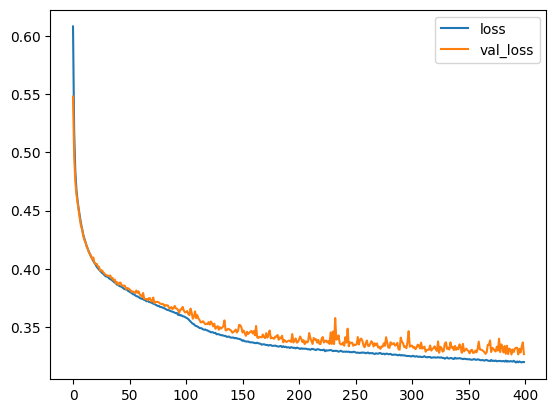

In [61]:
loss_df[['loss', 'val_loss']].plot(legend=True)
plt.show()

In [65]:
def build_model_with_dropout():
    model = keras.Sequential(name="classification_model_with_Dropout")
    model.add(layers.Input(shape=(X_train.shape[1],))) 
    model.add(layers.Dense(units = 20, activation = 'relu', name="first_layer"))
    model.add(layers.Dropout(rate=0.5)) 
    
    model.add(layers.Dense(units = 8, activation = 'relu', name="second_layer"))
    model.add(layers.Dropout(rate=0.5))
    
    #output layer
    model.add(layers.Dense(units = 1, activation = 'sigmoid', name="output_layer"))
    model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [66]:
model_with_dropout = build_model_with_dropout()
model_with_dropout.summary()

Model: "classification_model_with_Dropout"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 first_layer (Dense)         (None, 20)                140       
                                                                 
 dropout (Dropout)           (None, 20)                0         
                                                                 
 second_layer (Dense)        (None, 8)                 168       
                                                                 
 dropout_1 (Dropout)         (None, 8)                 0         
                                                                 
 output_layer (Dense)        (None, 1)                 9         
                                                                 
Total params: 317
Trainable params: 317
Non-trainable params: 0
_________________________________________________________________


In [67]:
model.fit(X_train,y_train, validation_data=(X_test, y_test), epochs=400, batch_size=128)

Epoch 1/400
176/176 [==============================] - 1s 3ms/step - loss: 0.3192 - accuracy: 0.8453 - val_loss: 0.3254 - val_accuracy: 0.8379
Epoch 2/400
176/176 [==============================] - 0s 3ms/step - loss: 0.3194 - accuracy: 0.8434 - val_loss: 0.3293 - val_accuracy: 0.8365
Epoch 3/400
176/176 [==============================] - 1s 4ms/step - loss: 0.3196 - accuracy: 0.8457 - val_loss: 0.3266 - val_accuracy: 0.8382
Epoch 4/400
176/176 [==============================] - 1s 4ms/step - loss: 0.3195 - accuracy: 0.8433 - val_loss: 0.3281 - val_accuracy: 0.8382
Epoch 5/400
176/176 [==============================] - 1s 3ms/step - loss: 0.3194 - accuracy: 0.8438 - val_loss: 0.3300 - val_accuracy: 0.8350
Epoch 6/400
176/176 [==============================] - 1s 3ms/step - loss: 0.3198 - accuracy: 0.8439 - val_loss: 0.3326 - val_accuracy: 0.8357
Epoch 7/400
176/176 [==============================] - 1s 3ms/step - loss: 0.3198 - accuracy: 0.8423 - val_loss: 0.3297 - val_accuracy: 0.8318

In [68]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [69]:
early_stopping   = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=12)
model_checkpoint = ModelCheckpoint(monitor='val_loss', save_best_only=True, filepath="model_checkpoint.keras")
callback_list    = [early_stopping,model_checkpoint]

In [70]:
model = build_model()
model.summary()

Model: "classification_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 first_layer (Dense)         (None, 20)                140       
                                                                 
 second_layer (Dense)        (None, 8)                 168       
                                                                 
 output_layer (Dense)        (None, 1)                 9         
                                                                 
Total params: 317
Trainable params: 317
Non-trainable params: 0
_________________________________________________________________


In [71]:
model.fit(X_train,y_train, validation_data=(X_test, y_test), epochs=400, batch_size=128, 
          callbacks=callback_list)

Epoch 1/400
176/176 [==============================] - 4s 14ms/step - loss: 0.6257 - accuracy: 0.6615 - val_loss: 0.5621 - val_accuracy: 0.7221
Epoch 2/400
176/176 [==============================] - 1s 3ms/step - loss: 0.5329 - accuracy: 0.7345 - val_loss: 0.5086 - val_accuracy: 0.7506
Epoch 3/400
176/176 [==============================] - 1s 5ms/step - loss: 0.4953 - accuracy: 0.7513 - val_loss: 0.4807 - val_accuracy: 0.7595
Epoch 4/400
176/176 [==============================] - 1s 3ms/step - loss: 0.4652 - accuracy: 0.7621 - val_loss: 0.4567 - val_accuracy: 0.7736
Epoch 5/400
176/176 [==============================] - 1s 4ms/step - loss: 0.4481 - accuracy: 0.7732 - val_loss: 0.4443 - val_accuracy: 0.7823
Epoch 6/400
176/176 [==============================] - 1s 4ms/step - loss: 0.4382 - accuracy: 0.7813 - val_loss: 0.4356 - val_accuracy: 0.7855
Epoch 7/400
176/176 [==============================] - 1s 3ms/step - loss: 0.4306 - accuracy: 0.7846 - val_loss: 0.4299 - val_accuracy: 0.789

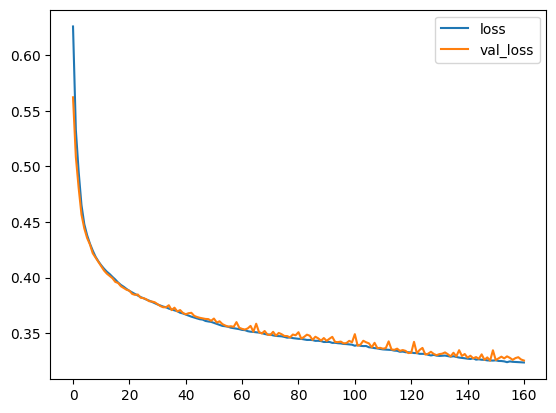

In [72]:
loss_df = pd.DataFrame(model.history.history)
loss_df[['loss', 'val_loss']].plot(legend=True)
plt.show()

In [73]:
def build_model_with_dropout():
    model = keras.Sequential(name="classification_model_with_Dropout")
    model.add(layers.Input(shape=(X_train.shape[1],)))  
    model.add(layers.Dense(units = 20, activation = 'relu', name="first_layer"))
    model.add(layers.Dropout(rate=0.5))  
    
    model.add(layers.Dense(units = 8, activation = 'relu', name="second_layer"))
    model.add(layers.Dropout(rate=0.5))
    
    
    model.add(layers.Dense(units = 1, activation = 'sigmoid', name="output_layer"))
    model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [74]:
model_with_dropout = build_model_with_dropout()
model_with_dropout.summary()

Model: "classification_model_with_Dropout"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 first_layer (Dense)         (None, 20)                140       
                                                                 
 dropout_2 (Dropout)         (None, 20)                0         
                                                                 
 second_layer (Dense)        (None, 8)                 168       
                                                                 
 dropout_3 (Dropout)         (None, 8)                 0         
                                                                 
 output_layer (Dense)        (None, 1)                 9         
                                                                 
Total params: 317
Trainable params: 317
Non-trainable params: 0
_________________________________________________________________


In [75]:
model_with_dropout.fit(X_train,y_train, validation_data=(X_test, y_test), epochs=400, batch_size=128, 
          callbacks=callback_list)

Epoch 1/400
176/176 [==============================] - 2s 4ms/step - loss: 0.7061 - accuracy: 0.5422 - val_loss: 0.6418 - val_accuracy: 0.6560
Epoch 2/400
176/176 [==============================] - 1s 3ms/step - loss: 0.6505 - accuracy: 0.6051 - val_loss: 0.6029 - val_accuracy: 0.6850
Epoch 3/400
176/176 [==============================] - 1s 3ms/step - loss: 0.6264 - accuracy: 0.6415 - val_loss: 0.5791 - val_accuracy: 0.7028
Epoch 4/400
176/176 [==============================] - 1s 3ms/step - loss: 0.6132 - accuracy: 0.6574 - val_loss: 0.5604 - val_accuracy: 0.7260
Epoch 5/400
176/176 [==============================] - 1s 3ms/step - loss: 0.5984 - accuracy: 0.6783 - val_loss: 0.5458 - val_accuracy: 0.7321
Epoch 6/400
176/176 [==============================] - 1s 4ms/step - loss: 0.5919 - accuracy: 0.6823 - val_loss: 0.5391 - val_accuracy: 0.7404
Epoch 7/400
176/176 [==============================] - 1s 3ms/step - loss: 0.5835 - accuracy: 0.6916 - val_loss: 0.5338 - val_accuracy: 0.7347

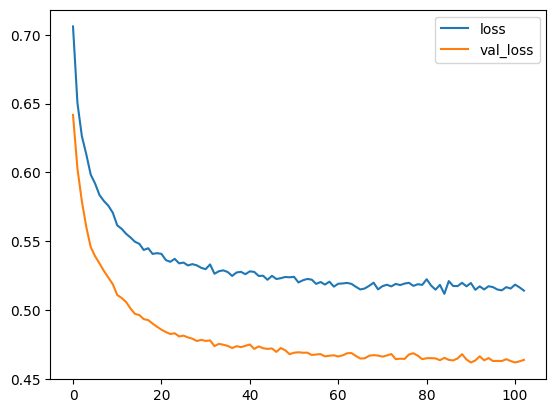

In [76]:
loss_df_with_dropout = pd.DataFrame(model_with_dropout.history.history)
loss_df_with_dropout[['loss', 'val_loss']].plot(legend=True)
plt.show()

In [77]:
model.evaluate(X_test, y_test)


176/176 [==============================] - 0s 3ms/step - loss: 0.3256 - accuracy: 0.8366


[0.32555991411209106, 0.8366292715072632]

In [78]:
model_with_dropout.evaluate(X_test, y_test)


176/176 [==============================] - 0s 2ms/step - loss: 0.4638 - accuracy: 0.7584


[0.46380025148391724, 0.7584179639816284]

In [80]:
y_test_probs = model_with_dropout.predict(X_test)


176/176 [==============================] - 0s 2ms/step


In [81]:
y_test_probs 

array([[0.0759255],
       [0.4595828],
       [0.9971913],
       ...,
       [0.9466976],
       [0.5317599],
       [0.951363 ]], dtype=float32)

In [82]:
predictions = pd.DataFrame({"y_test":y_test, "y_test_probs":y_test_probs.reshape(-1,)})
predictions['y_test_predictions']= np.where(predictions['y_test_probs']>0.5,1,0)
predictions.head()

,y_test,y_test_probs,y_test_predictions
0,0,0.075925,0
1,0,0.459583,0
2,1,0.997191,1
3,1,1.000000,1
4,0,0.631050,1


In [83]:
from sklearn.metrics import classification_report, confusion_matrix


In [84]:
print(classification_report(y_true= predictions.y_test, y_pred=predictions.y_test_predictions) )


              precision    recall  f1-score   support

           0       0.82      0.63      0.71      2668
           1       0.72      0.87      0.79      2945

    accuracy                           0.76      5613
   macro avg       0.77      0.75      0.75      5613
weighted avg       0.77      0.76      0.75      5613



In [85]:
print(confusion_matrix(y_true= predictions.y_test, y_pred=predictions.y_test_predictions) )


[[1692  976]
 [ 380 2565]]


In [86]:
from tensorflow.keras.models import load_model


In [87]:
model.save('DNN_classification')
model_with_dropout.save('DNN_withDropout_classification')


INFO:tensorflow:Assets written to: DNN_classification\assets


INFO:tensorflow:Assets written to: DNN_classification\assets


INFO:tensorflow:Assets written to: DNN_withDropout_classification\assets


INFO:tensorflow:Assets written to: DNN_withDropout_classification\assets


In [88]:
loaded_model = load_model('DNN_classification')
loaded_model_with_Dropout = load_model('DNN_withDropout_classification')


In [89]:
loaded_model.summary()

Model: "classification_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 first_layer (Dense)         (None, 20)                140       
                                                                 
 second_layer (Dense)        (None, 8)                 168       
                                                                 
 output_layer (Dense)        (None, 1)                 9         
                                                                 
Total params: 317
Trainable params: 317
Non-trainable params: 0
_________________________________________________________________


In [90]:
loaded_model.predict(X_test)


176/176 [==============================] - 0s 2ms/step


array([[1.1548282e-22],
       [2.2239926e-01],
       [9.9694055e-01],
       ...,
       [9.9269426e-01],
       [5.5077857e-01],
       [9.9337369e-01]], dtype=float32)

In [91]:
loaded_model_with_Dropout.summary()

Model: "classification_model_with_Dropout"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 first_layer (Dense)         (None, 20)                140       
                                                                 
 dropout_2 (Dropout)         (None, 20)                0         
                                                                 
 second_layer (Dense)        (None, 8)                 168       
                                                                 
 dropout_3 (Dropout)         (None, 8)                 0         
                                                                 
 output_layer (Dense)        (None, 1)                 9         
                                                                 
Total params: 317
Trainable params: 317
Non-trainable params: 0
_________________________________________________________________


In [92]:
loaded_checkpoint = load_model("model_checkpoint.keras")
loaded_checkpoint.summary()

Model: "classification_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 first_layer (Dense)         (None, 20)                140       
                                                                 
 second_layer (Dense)        (None, 8)                 168       
                                                                 
 output_layer (Dense)        (None, 1)                 9         
                                                                 
Total params: 317
Trainable params: 317
Non-trainable params: 0
_________________________________________________________________
